<function matplotlib.pyplot.show(*args, **kw)>

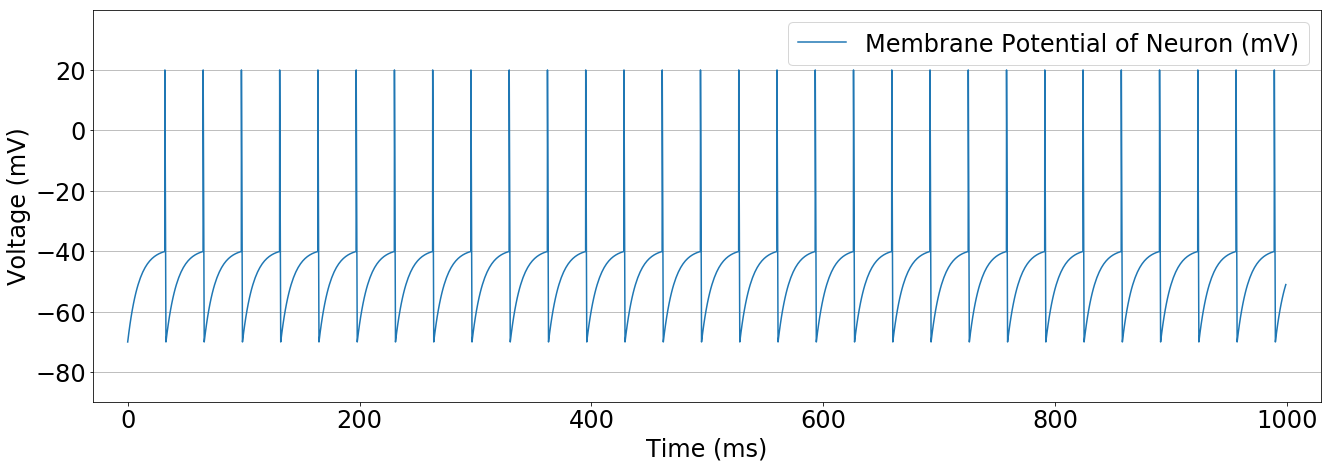

In [109]:
### QUESTION 1

import matplotlib.pyplot as plt

# tau * dV/dt = EL − V + Rm * Ie

def diff_V(tau, EL, V, Rm, Ie):
    return (EL - V + Rm * Ie)/tau

# units
milli = 10 ** -3
nano = 10 ** -9
mega = 10 ** 6

# parameters
tau = 10 * milli
EL = -70 * milli
Vr = -70 * milli
Vt = -40 * milli
Vs = 20 * milli
Rm = 10 * mega
Ie = 3.1 * nano

t = 0
delta_t = 1 * milli
t_final = 1

V = Vr

V_vector = []
t_vector = []

while t < t_final:
    t_vector.append(t)
    V_vector.append(V)
    V = V + delta_t * diff_V(tau, EL, V, Rm, Ie)
    if V > Vt:
        V_vector.append(Vs)
        t_vector.append(t+0.0001)
        V = Vr
    t = t + delta_t
    
t_plot = [t * 1000 for t in t_vector]
V_plot = [v * 1000 for v in V_vector]

plt.plot(t_plot, V_plot)
plt.grid(True, axis='y')
plt.subplots_adjust(bottom=0.2)
plt.rcParams.update({'font.size': 24})
plt.rcParams["figure.figsize"] = [22,8]
plt.margins(x=0.03, y=0.22)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(["Membrane Potential of Neuron (mV)"], loc=1)
#plt.savefig("Q1.png")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

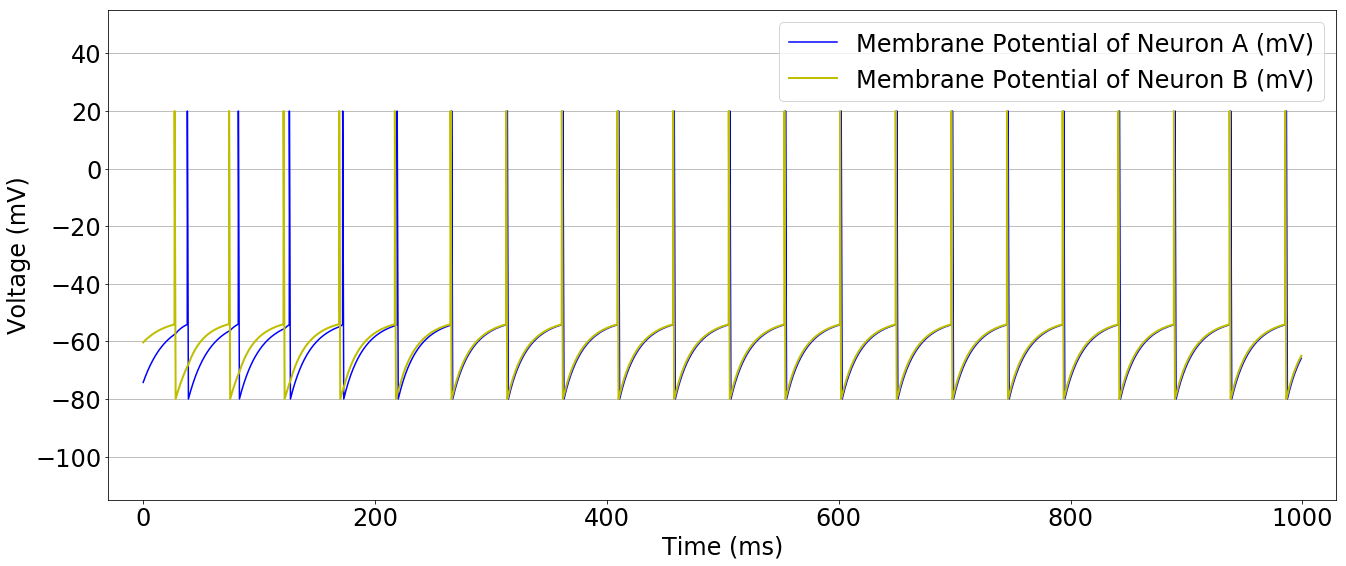

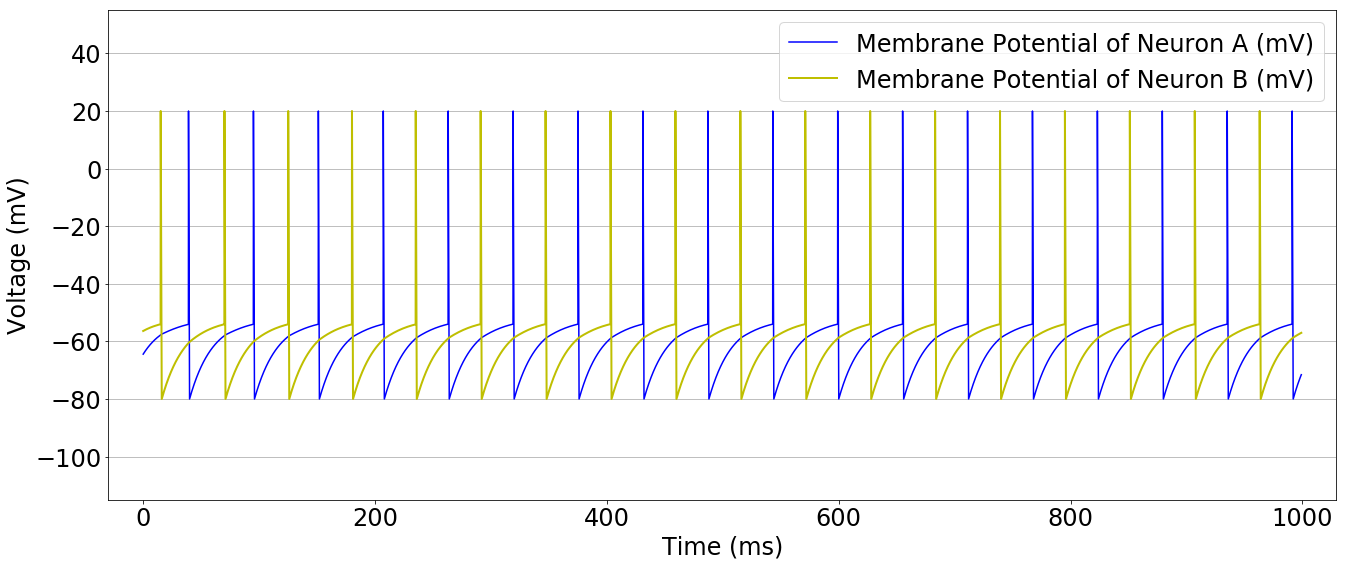

In [127]:
### QUESTION 2

import matplotlib.pyplot as plt
import random

# tau_m * dV/dt = EL − V + (Rm)(Ie) + (Rm)(Isyn)
# Isyn = (gs)(s)(Es - V)

def diff_V(tau_m, EL, V, RmIe, Rmgs, s, Es):
    return (EL - V + RmIe + Rmgs * s * (Es - V))/tau_m

# tau_s * ds/dt = -s

def diff_s(tau_s, s):
    return -s/tau_s

# units
milli = 10 ** -3

# parameters
tau_m = 20 * milli
EL = -70 * milli
Vr = -80 * milli
Vt = -54 * milli
Vs = 20 * milli
RmIe = 18 * milli

Rmgs = 0.15
P = 0.5
tau_s = 10 * milli

delta_t = 1 * milli
t_final = 1


# CASE 1: EXCITATORY SYNAPSES

Es = 0
s1 = 0
s2 = 0
V1 = random.uniform(Vr, Vt)
V2 = random.uniform(Vr, Vt)

V1_vector = []
V2_vector = []
t1_vector = []
t2_vector = []

t = 0

while t < t_final:
    t1_vector.append(t)
    V1_vector.append(V1)
    t2_vector.append(t)
    V2_vector.append(V2)
    V1 = V1 + delta_t * diff_V(tau_m, EL, V1, RmIe, Rmgs, s2, Es)
    V2 = V2 + delta_t * diff_V(tau_m, EL, V2, RmIe, Rmgs, s1, Es)
    s1 = s1 + delta_t * diff_s(tau_s, s1)
    s2 = s2 + delta_t * diff_s(tau_s, s2)
    if V1 > Vt:
        V1_vector.append(Vs)
        t1_vector.append(t+0.0001)
        V1 = Vr
        s1 = s1 + P
    if V2 > Vt:
        V2_vector.append(Vs)
        t2_vector.append(t+0.0001)
        V2 = Vr
        s2 = s2 + P
    t = t + delta_t
 
t1_plot = [t * 1000 for t in t1_vector]
V1_plot = [v * 1000 for v in V1_vector]
t2_plot = [t * 1000 for t in t2_vector]
V2_plot = [v * 1000 for v in V2_vector]

plt.figure(0)
plt.plot(t1_plot, V1_plot, 'b', label="Membrane Potential of Neuron A (mV)")
plt.plot(t2_plot, V2_plot, 'y', label="Membrane Potential of Neuron B (mV)", linewidth=2)
plt.grid(True, axis='y')
plt.subplots_adjust(bottom=0.2)
plt.rcParams.update({'font.size': 24})
plt.rcParams["figure.figsize"] = [22,10]
plt.margins(x=0.03, y=0.35)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(loc=1)
#plt.savefig("Q2a.png")
plt.show


# CASE 2: INHIBITORY SYNAPSES

Es = -80 * milli
s1 = 0
s2 = 0
V1 = random.uniform(Vr, Vt)
V2 = random.uniform(Vr, Vt)

V1_vector = []
V2_vector = []
t1_vector = []
t2_vector = []

t = 0

while t < t_final:
    t1_vector.append(t)
    V1_vector.append(V1)
    t2_vector.append(t)
    V2_vector.append(V2)
    V1 = V1 + delta_t * diff_V(tau_m, EL, V1, RmIe, Rmgs, s2, Es)
    V2 = V2 + delta_t * diff_V(tau_m, EL, V2, RmIe, Rmgs, s1, Es)
    s1 = s1 + delta_t * diff_s(tau_s, s1)
    s2 = s2 + delta_t * diff_s(tau_s, s2)
    if V1 > Vt:
        V1_vector.append(Vs)
        t1_vector.append(t+0.0001)
        V1 = Vr
        s1 = s1 + P
    if V2 > Vt:
        V2_vector.append(Vs)
        t2_vector.append(t+0.0001)
        V2 = Vr
        s2 = s2 + P
    t = t + delta_t
    
t1_plot = [t * 1000 for t in t1_vector]
V1_plot = [v * 1000 for v in V1_vector]
t2_plot = [t * 1000 for t in t2_vector]
V2_plot = [v * 1000 for v in V2_vector]

plt.figure(1)
plt.plot(t1_plot, V1_plot, 'b', label="Membrane Potential of Neuron A (mV)")
plt.plot(t2_plot, V2_plot, 'y', label="Membrane Potential of Neuron B (mV)", linewidth=2)
plt.grid(True, axis='y')
plt.subplots_adjust(bottom=0.2)
plt.rcParams.update({'font.size': 24})
plt.rcParams["figure.figsize"] = [22,10]
plt.margins(x=0.03, y=0.35)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(loc=1)
#plt.savefig("Q2b.png")
plt.show